In [26]:
#Import all needed libraries and packages
import pandas as pd
from keras import backend as K
import numpy as np
from nltk.tokenize import RegexpTokenizer
from tensorflow import keras
import torch
import tensorflow as tf
from sklearn.model_selection import train_test_split
import nltk
from nltk import word_tokenize
from nltk import StanfordTagger
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pickle
import os
from ast import literal_eval

In [27]:
#Importing already filtered out datasets from New York Times
print("NYT publishers and dataset size:")
nyt_edu_original= list(open("/data/output_txt/nyt-edu.txt"))
print("NYT-EDU original features:",len(nyt_edu_original ))
nyt_fin_original= list(open("/data/output_txt/nyt-fin.txt"))
print("NYT-FIN original features:",len(nyt_fin_original))
nyt_law_original= list(open("/data/output_txt/nyt-law.txt"))
print("NYT-LAW original features:",len(nyt_law_original))
nyt_med_original = list(open("/data/output_txt/nyt-med.txt"))
print("NYT-Med original features:",len(nyt_med_original))
nyt_mil_original= list(open("/data/output_txt/nyt-mil.txt"))
print("NYT-MILL original features:",len(nyt_mil_original))
nyt_pol_original = list(open("/data/output_txt/nyt-pol.txt"))
print("NYT-POL original features:",len(nyt_pol_original))

NYT publishers and dataset size:
NYT-EDU original features: 1881
NYT-FIN original features: 3100
NYT-LAW original features: 3553
NYT-Med original features: 1743
NYT-MILL original features: 2132
NYT-POL original features: 6886


In [28]:
def count_claim_premise(example_set,name):
    count_dataset={}
    for s in example_set:
        text=s.split("\t")[1].split("\n")[0]
        label=s.split("\t")[0]
        if label not in count_dataset:
            count_dataset[label]=[]
        count_dataset[label].append(text)
    print(name,"-general number of articles:",len(example_set))
    print("precisely:")
    for k,v in count_dataset.items():
        print(k,len(v),"-",(((len(v)/len(example_set)))*100))

In [29]:
count_claim_premise(nyt_edu_original,"NYT-Education")
print("-------")
count_claim_premise(nyt_fin_original,"NYT-Finances")
print("-------")
count_claim_premise(nyt_law_original,"NYT-Law")
print("-------")
count_claim_premise(nyt_med_original,"NYT-Medicine")
print("-------")
count_claim_premise(nyt_pol_original,"NYT-Politics")
print("-------")
count_claim_premise(nyt_pol_original,"NYT-Politics")

NYT-Education -general number of articles: 1881
precisely:
editorial 504 - 26.794258373205743
news 1377 - 73.20574162679426
-------
NYT-Finances -general number of articles: 3100
precisely:
news 2560 - 82.58064516129032
editorial 540 - 17.419354838709676
-------
NYT-Law -general number of articles: 3553
precisely:
editorial 931 - 26.203208556149733
news 2622 - 73.79679144385027
-------
NYT-Medicine -general number of articles: 1743
precisely:
news 1292 - 74.12507171543317
editorial 451 - 25.87492828456684
-------
NYT-Politics -general number of articles: 6886
precisely:
editorial 1520 - 22.073772872494917
news 5366 - 77.92622712750509
-------
NYT-Politics -general number of articles: 6886
precisely:
editorial 1520 - 22.073772872494917
news 5366 - 77.92622712750509


In [30]:
def extract_arg_features(dataset):
    arg_features=[]
    arg_labels=[]
    arg_features_dict={}
    for s in dataset:
        text=s.split("\t")[1].split("\n")[0]
        text=text.replace('"',"")
        tokenized=nltk.sent_tokenize(text)
        if len(tokenized)<=100:
            sequence=literal_eval(s.split("\t")[2].split("\n")[0])
            label=s.split("\t")[0]
            arg_features.append(sequence)
            arg_labels.append(label)
            arg_features_dict[text]=(sequence,label)
    return arg_features_dict,arg_features,arg_labels

In [31]:
#Argumentative features.3 labels
print("NYT publishers and dataset size of argumentative features with 3 labels:Claim, Premises,None")
nyt_edu_arg = list(open("/data/output_txt/nyt-edu-argfeat.txt"))
edu_arg_3,edu_arg_3_features,edu_arg_3_labels=extract_arg_features(nyt_edu_arg)
print("NYT-EDU argumentative features:",len(edu_arg_3))
nyt_fin_arg = list(open("/data/output_txt/nyt-fin-argfeat.txt"))
fin_arg_3,fin_arg_3_features,fin_arg_3_labels=extract_arg_features(nyt_fin_arg)
print("NYT-FIN argumentative features:",len(fin_arg_3))
nyt_law_arg = list(open("/data/output_txt/nyt-law-argfeat.txt"))
law_arg_3,law_arg_3_features,law_arg_3_labels=extract_arg_features(nyt_law_arg)
print("NYfT-LAW argumentative features:",len(law_arg_3))
nyt_med_arg = list(open("/data/output_txt/nyt-med-argfeat.txt"))
med_arg_3,med_arg_3_features,med_arg_3_labels=extract_arg_features(nyt_med_arg)
print("NYT-Med argumentative features:",len(med_arg_3))
nyt_mil_arg = list(open("/data/output_txt/nyt-mil-argfeat.txt"))
mil_arg_3,mil_arg_3_features,mil_arg_3_labels=extract_arg_features(nyt_mil_arg)
print("NYT-MILL argumentative features:",len(mil_arg_3))
nyt_pol_arg = list(open("/data/output_txt/nyt-pol-argfeat.txt"))
pol_arg_3,pol_arg_3_features,pol_arg_3_labels=extract_arg_features(nyt_pol_arg)
print("NYT-POL argumentative features:",len(pol_arg_3))

NYT publishers and dataset size of argumentative features with 3 labels:Claim, Premises,None
NYT-EDU argumentative features: 1833
NYT-FIN argumentative features: 3061
NYfT-LAW argumentative features: 3520
NYT-Med argumentative features: 1699
NYT-MILL argumentative features: 2113
NYT-POL argumentative features: 6826


In [32]:
#Argumentative features.6 labels
print("NYT publishers and dataset size of argumentative features with 3 labels:'assumption','anecdote','testimony','statistics','other','common-ground'")
nyt_edu_6_arg = list(open("nyt-edu-argfeat-6.txt"))
edu_arg_6,edu_arg_6_features,edu_arg_6_labels=extract_arg_features(nyt_edu_6_arg)
print("NYT-EDU arg features:",len(edu_arg_6))
nyt_fin_6_arg = list(open("/data/output_txt/nyt-fin-argfeat-6.txt"))
fin_arg_6,fin_arg_6_features,fin_arg_6_labels=extract_arg_features(nyt_fin_6_arg)
print("NYT-FIN arg features:",len(fin_arg_6))
nyt_law_6_arg = list(open("/data/output_txt/nyt-law-argfeat-6.txt"))
law_arg_6,law_arg_6_features,law_arg_6_labels=extract_arg_features(nyt_law_6_arg)
print("NYT-LAW arg features:",len(law_arg_6))
nyt_med_6_arg = list(open("/data/output_txt/nyt-med-argfeat-6.txt"))
med_arg_6,med_arg_6_features,med_arg_6_labels=extract_arg_features(nyt_med_6_arg)
print("NYT-Med arg features:",len(med_arg_6))
nyt_mil_6_arg = list(open("/data/output_txt/nyt-mil-argfeat-6.txt"))
mil_arg_6,mil_arg_6_features,mil_arg_6_labels=extract_arg_features(nyt_mil_6_arg)
print("NYT-MILL arg features:",len(mil_arg_6))
nyt_pol_6_arg = list(open("/data/output_txt/nyt-pol-argfeat-6.txt"))
pol_arg_6,pol_arg_6_features,pol_arg_6_labels=extract_arg_features(nyt_pol_6_arg)
print("NYT-POL arg features:",len(pol_arg_6))

NYT publishers and dataset size of argumentative features with 3 labels:'assumption','anecdote','testimony','statistics','other','common-ground'
NYT-EDU arg features: 1831
NYT-FIN arg features: 3059
NYT-LAW arg features: 3520
NYT-Med arg features: 1699
NYT-MILL arg features: 2113
NYT-POL arg features: 6826


In [78]:
def get_ds(example_dataset,wanted):
    new_ds=[]
    for s in example_dataset:
        text=s.split("\t")[1].split("\n")[0]
        sequence=literal_eval(s.split("\t")[2].split("\n")[0])
        label=s.split("\t")[0]
        h=str(label+"\t"+text+"\t"+str(sequence)+"\n")
        if label==wanted:
            new_ds.append(str(h))
        else:
            pass
    return new_ds
def get_percentage(dataset,labels):
    ready_dict={}
    if labels==6:
        result=combine_arg_features_6(dataset)
    else:
        result=combine_arg_features_3(dataset)
    for k,v in result.items():
        each_key={}
        all_combined=sum(v.values())
        for key,value in v.items():
            each_key[key]=(value/all_combined)*100
        ready_dict[k]=each_key
    return ready_dict
def combine_arg_features_6(example_dataset):
    count_arguments={}
    for s in example_dataset:
        text=s.split("\t")[1].split("\n")[0]
        text=text.replace('"',"")
        tokenized=nltk.sent_tokenize(text)
        if len(tokenized)<=100:
            count=0
            sequence=literal_eval(s.split("\t")[2].split("\n")[0])
            for el in sequence:
                count+=1
                if el!=0:
                    if el==1:
                        el="anecdote"
                    if el==3 :
                        el="common-ground"
                    if el==5:
                        el="statistics"
                    if el==4:
                        el="other"
                    if el==6:
                        el="testimony"
                    if el==2:
                        el="assumption"
                    if count not in count_arguments:
                        count_arguments[count]={}
                    if el not in count_arguments[count]:
                        count_arguments[count][el]=0
                    count_arguments[count][el]+=1
    return count_arguments

def combine_arg_features_3(example_dataset):
    count_arguments={}
    for s in example_dataset:
        text=s.split("\t")[1].split("\n")[0]
        text=text.replace('"',"")
        tokenized=nltk.sent_tokenize(text)
        if len(tokenized)<=100:
            count=0
            sequence=literal_eval(s.split("\t")[2].split("\n")[0])
            for el in sequence:
                count+=1
                if el!=0:
                    if el==1:
                        el="claim"
                    if el==2 :
                        el="others"
                    if el==3:
                        el="premise"
                    if count not in count_arguments:
                        count_arguments[count]={}
                    if el not in count_arguments[count]:
                        count_arguments[count][el]=0
                    count_arguments[count][el]+=1
    return count_arguments

In [ ]:
news_6=get_ds(nyt_pol_6_arg,"news")
editorial_6=get_ds(nyt_pol_6_arg,"editorial")
news_3=get_ds(nyt_pol_arg,"news")
editorial_3=get_ds(nyt_pol_arg,"editorial")

In [81]:
general_6=get_percentage(nyt_pol_6_arg,6)
general_3=get_percentage(nyt_pol_arg,3)
news_6_p=get_percentage(news_6,6)
editorial_6_p=get_percentage(editorial_6,6)
news_3_p=get_percentage(news_3,3)
editorial_3_p=get_percentage(editorial_3,3)

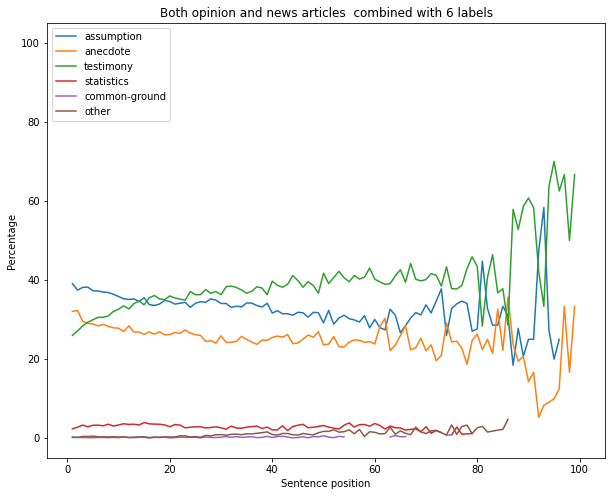

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(general_6)
df2 = df.transpose()
df2.plot(figsize = (10,8))
plt.ylabel('Percentage')
plt.xlabel('Sentence position')
plt.title("Both opinion and news articles  combined with 6 labels")
plt.show()

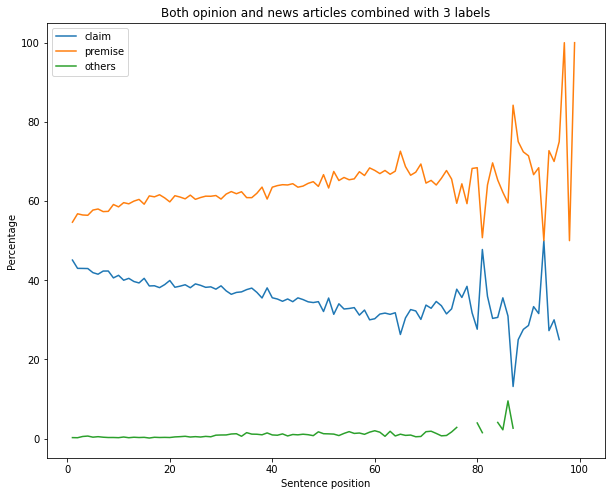

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(general_3)
df2 = df.transpose()
df2.plot(figsize = (10,8))
plt.ylabel('Percentage')
plt.xlabel('Sentence position')
plt.title("Both opinion and news articles combined with 3 labels")
plt.show()

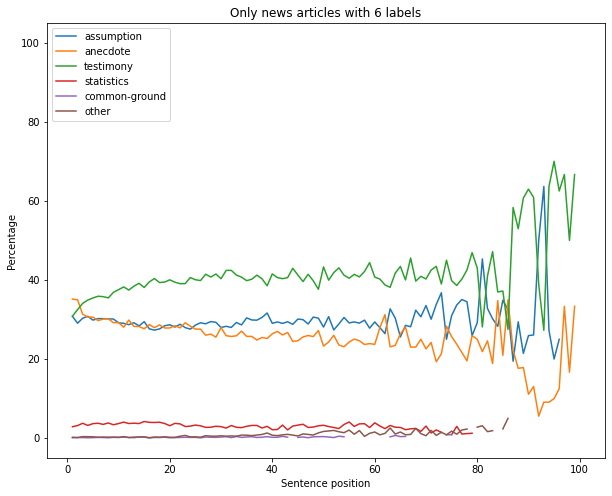

In [107]:
df = pd.DataFrame(news_6_p)
df2 = df.transpose()
df2.plot(figsize = (10,8))
plt.ylabel('Percentage')
plt.xlabel('Sentence position')
plt.title("Only news articles with 6 labels")
plt.show()

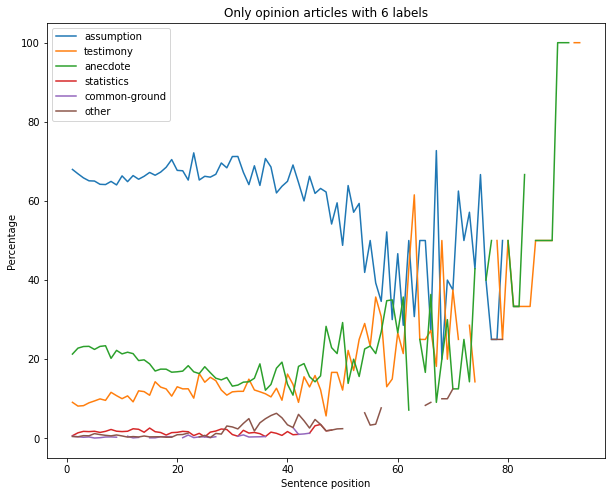

In [108]:

df = pd.DataFrame(editorial_6_p)
df2 = df.transpose()
df2.plot(figsize = (10,8))
plt.ylabel('Percentage')
plt.xlabel('Sentence position')
plt.title("Only opinion articles with 6 labels")
plt.show()

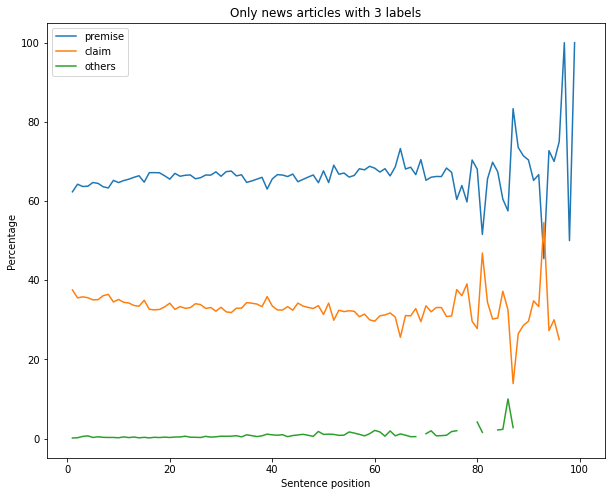

In [111]:
df = pd.DataFrame(news_3_p)
df2 = df.transpose()
df2.plot(figsize = (10,8))
plt.ylabel('Percentage')
plt.xlabel('Sentence position')
plt.title("Only news articles with 3 labels")
plt.show()

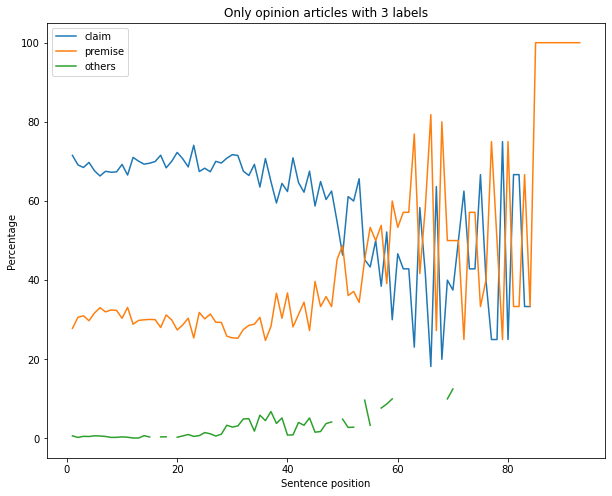

In [112]:
df = pd.DataFrame(editorial_3_p)
df2 = df.transpose()
df2.plot(figsize = (10,8))
plt.ylabel('Percentage')
plt.xlabel('Sentence position')
plt.title("Only opinion articles with 3 labels")
plt.show()